Получите траекторию движения спутника вокруг планеты, проведя численное решение задачи двух тел

$$
  x' = z,
$$

$$
  y' = u,
$$

$$
  z' = - \frac{x}{(x^2 + y^2)^\frac{3}{2}}
$$

$$
  u' = - \frac{y}{(x^2 + y^2)^\frac{3}{2}}
$$

$$
  x(0) = 0.5 \hspace{1cm}
  y(0) = z(0) = 0 \hspace{1cm}
  u(0) = \sqrt{3} \approx 1.73
$$

на интервале времени $0 < t \leq 20$ методом Рунге-Кутты первого, второго, третьего и четвертого порядков аппроксимации. Исследуйте зависимость численного решения от шага интегрирования.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
class ButcherTable:
  def __init__(self, rank):
    self.rank = rank
    self.setTable()

  def setTable(self):
    if (self.rank == 1):
      self.a = [[0, 0], [1, 0]]
      self.b = [0, 1]
      self.c = [0, 1]
    elif (self.rank == 2):
      self.a = [[0, 0], [1/2, 0]]
      self.b = [0, 1]
      self.c = [0, 1/2]
    elif (self.rank == 3):
      self.a = [[0, 0, 0], [1/3, 0, 0], [0, 2/3, 0]]
      self.b = [1/4, 0, 3/4]
      self.c = [0, 1/3, 2/3]
    elif (self.rank == 4):
      self.a = [[0, 0, 0, 0], [1/2, 0, 0, 0], [0, 1/2, 0, 0], [0, 0, 1, 0]]
      self.b = [1/6, 2/6, 2/6, 1/6]
      self.c = [0, 1/2, 1/2, 1]

In [ ]:
class RungeCutt:
  def __init__(self, function, rank, initial_position, h = 0.01, max_time = 20):
    self.function = function
    self.rank = rank
    self.h = h
    self.butcher_table = ButcherTable(self.rank)

    self.initial_position = initial_position.copy()
    self.X = self.initial_position.copy()

    self.time = 0
    self.max_time = max_time

    self.trajectory = [self.initial_position]

  def getKMassive(self):
    k_mass = []
    for i in range(0, self.rank):
      k = self.function(self.X + 
                        sum([self.butcher_table.a[j+1][j] * 
                             self.h * k_mass[j]
                             for j in range(0, i)
                        ]))
      k_mass.append(k)
    return k_mass

  def getNextPoint(self):
    k_mass = self.getKMassive()
    #print(k_mass)
    self.X += sum([self.h * self.butcher_table.b[i] * k_mass[i] 
                   for i in range(0, self.rank)])
    self.time += self.h
    #print(self.X)
    return self.X.copy()

  def calcTrajectory(self):
    self.trajectory = [self.initial_position]
    while self.time < self.max_time:
      self.trajectory.append(self.getNextPoint())

    return self.trajectory


In [ ]:
# Use this function only for task VIII.11.4
def drawPlots(trajectory, rank, h, max_time = 20):
  X = []
  Y = []
  Z = []
  U = []
  #print(trajectory)
  for point in trajectory:
    X.append(point[0])
    Y.append(point[1])
    Z.append(point[2])
    U.append(point[3])

  #print(X)
  #print(Y)
  #print(Z)
  #print(U)

  plt.figure(figsize=[18,10])
  plt.plot(np.linspace(0, max_time, len(trajectory)), U)
  plt.title(f'Speed plot for approximation rank = {rank} and h = {h}')

  fig = plt.figure(figsize=[18,10])
  ax = fig.add_subplot(projection='3d')
  ax.plot(X, Y, Z, label='trajectory')
  ax.scatter(0, 0, 0, color = 'orange', s = 200, marker = 'o')
  ax.set_xlabel('X', fontsize=15)
  ax.set_ylabel('Y', fontsize=15)
  ax.set_zlabel('Z', fontsize=15)
  plt.title(f'Trajectory for approximation rank = {rank} and h = {h}')
  plt.draw()
  plt.show()

def differentialEquation(point):
  x, y, z, u = point[0], point[1], point[2], point[3]
  return np.array([
                   z,
                   u,
                   - x / ((x**2 + y**2)**(3/2)),
                   - y / ((x**2 + y**2)**(3/2))
  ])

initial_position = np.array([0.5, 0, 0, 3**0.5], np.float64)

# Порядок аппрокцимации

Проверим, как порядок аппроксимации влияет на результат вычислений и построим графики.

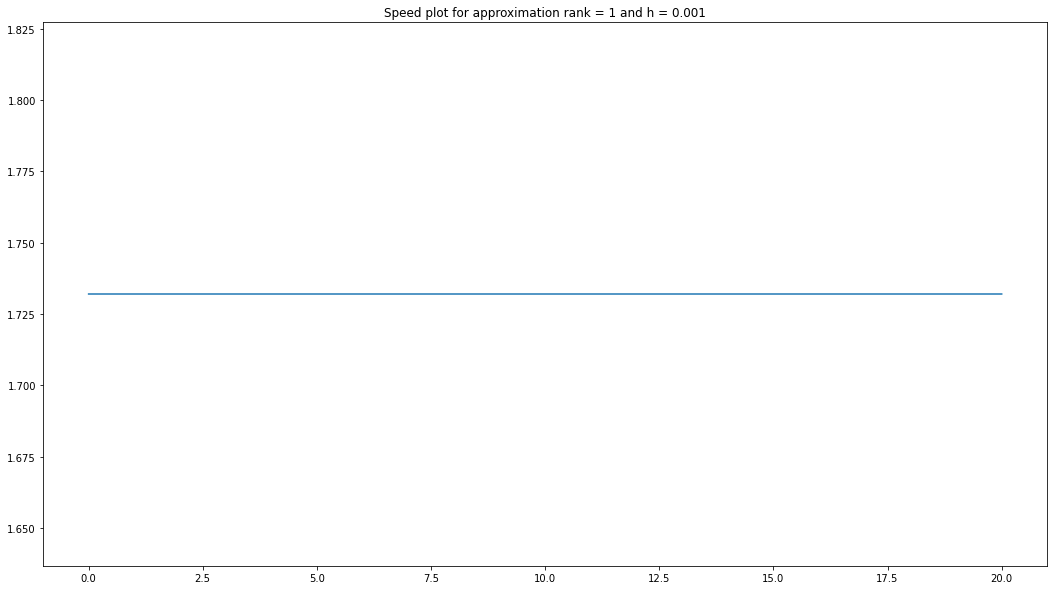

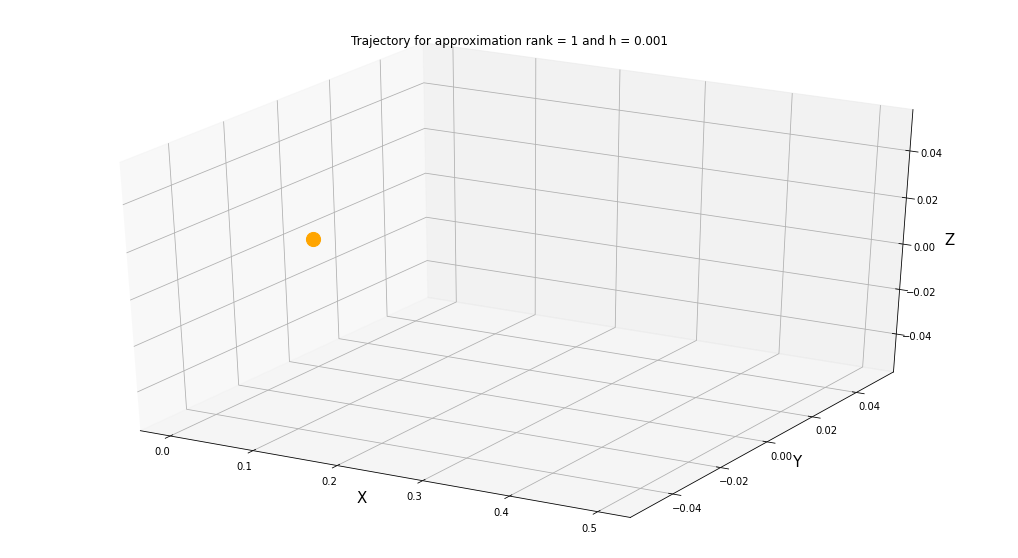

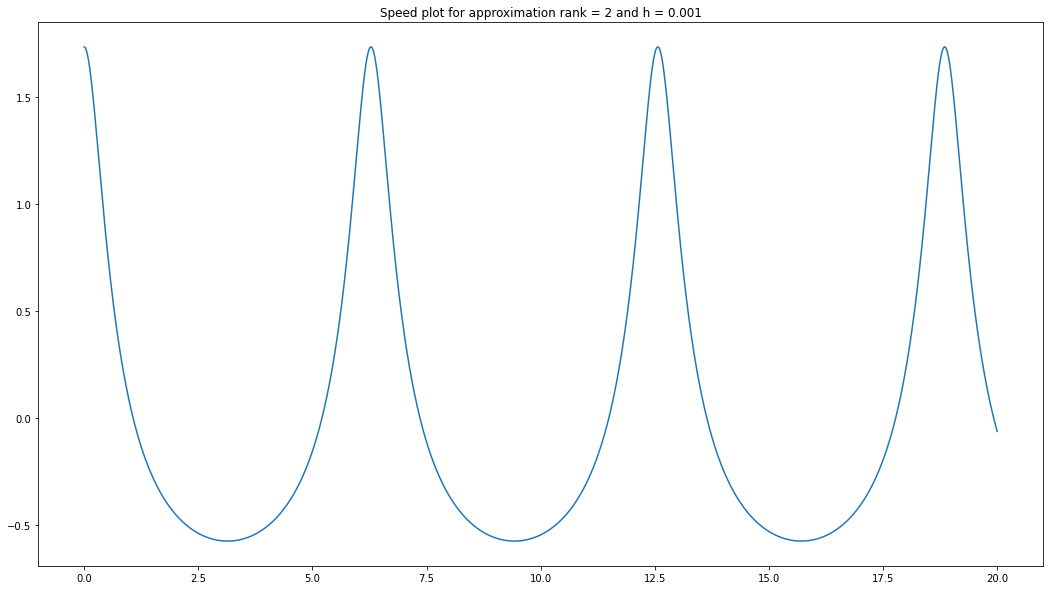

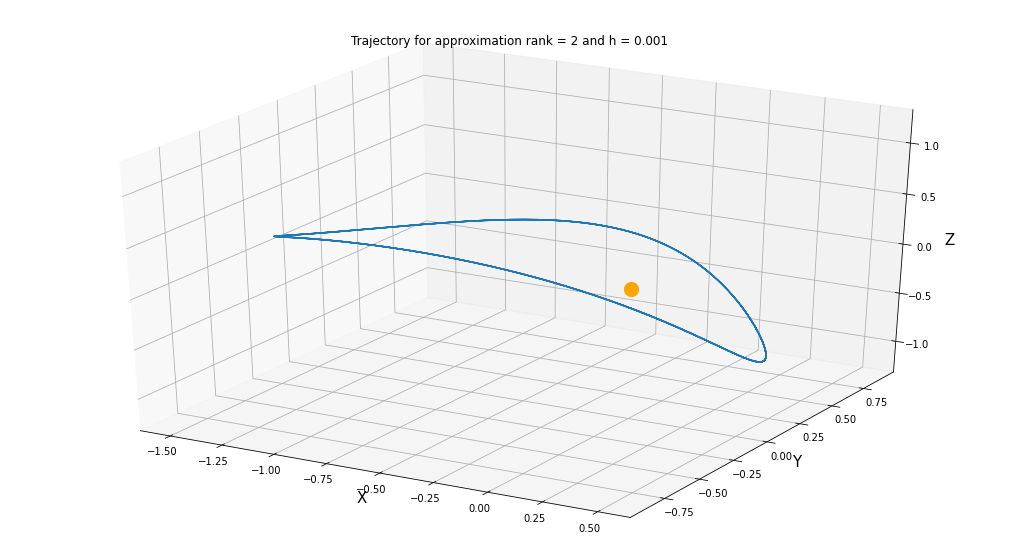

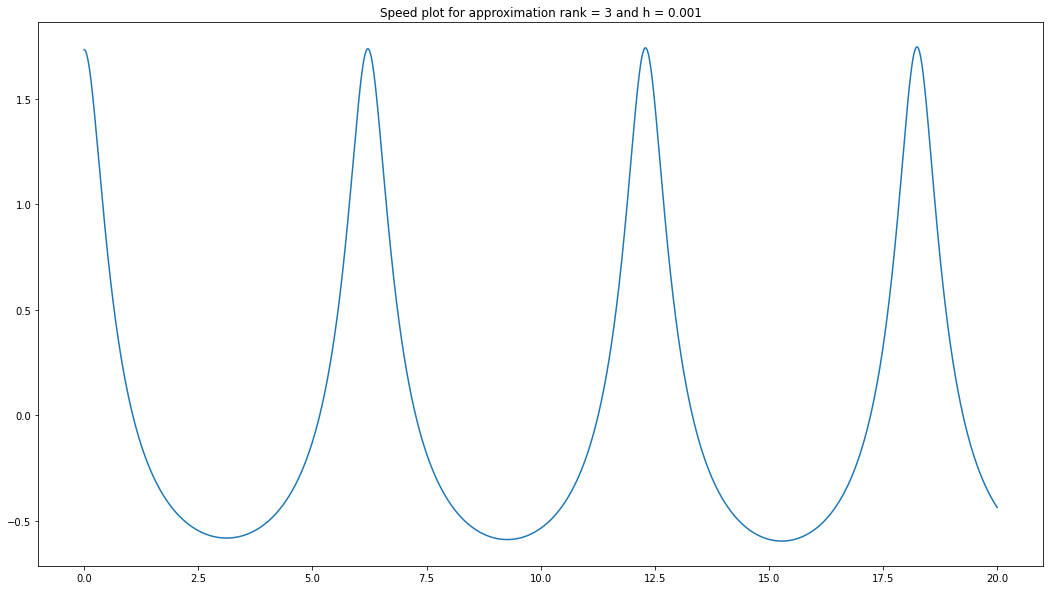

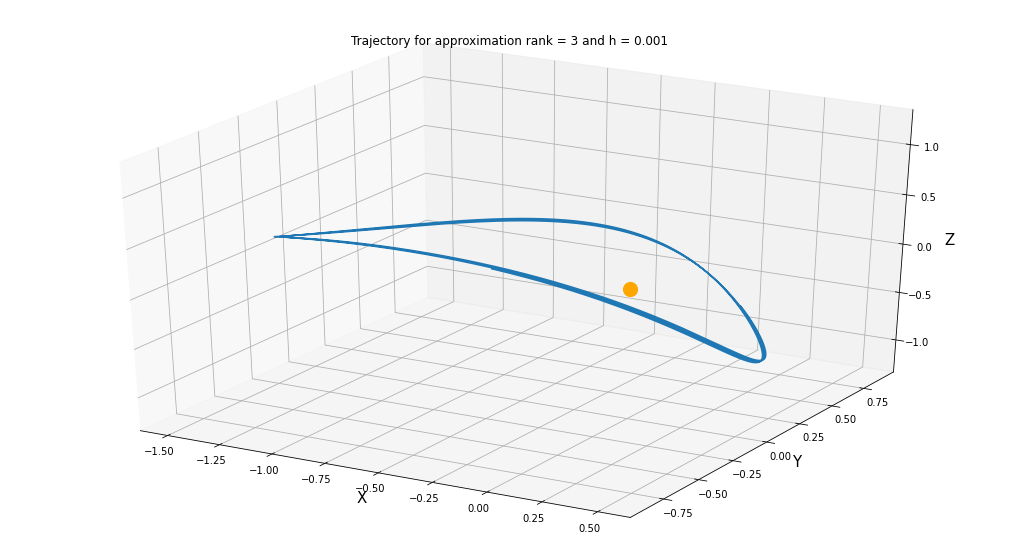

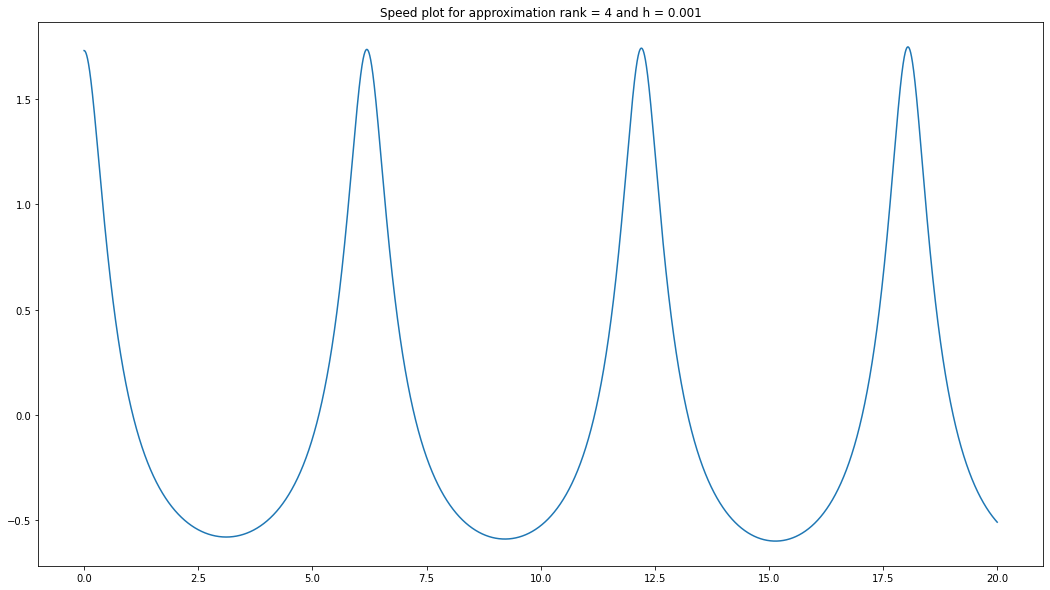

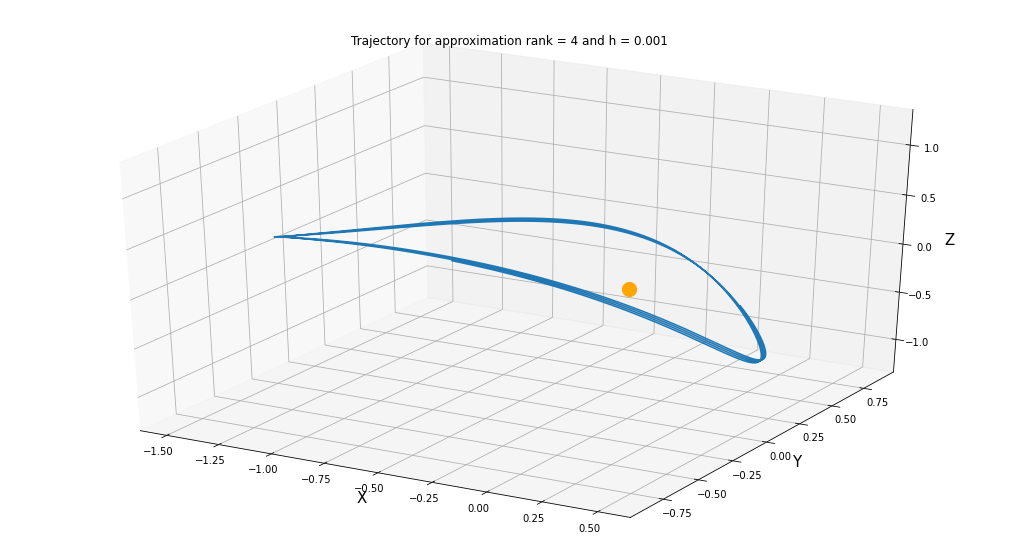

In [ ]:
for rank in range(1, 5):
  h = 0.001
  rk = RungeCutt(differentialEquation, rank, initial_position, h=h)
  drawPlots(rk.calcTrajectory(), rank, h)

# Шаг интегрирования

Проверим также как влияет на результат шаг интегрирования, взяв порядок аппроксимации `rank = 4`

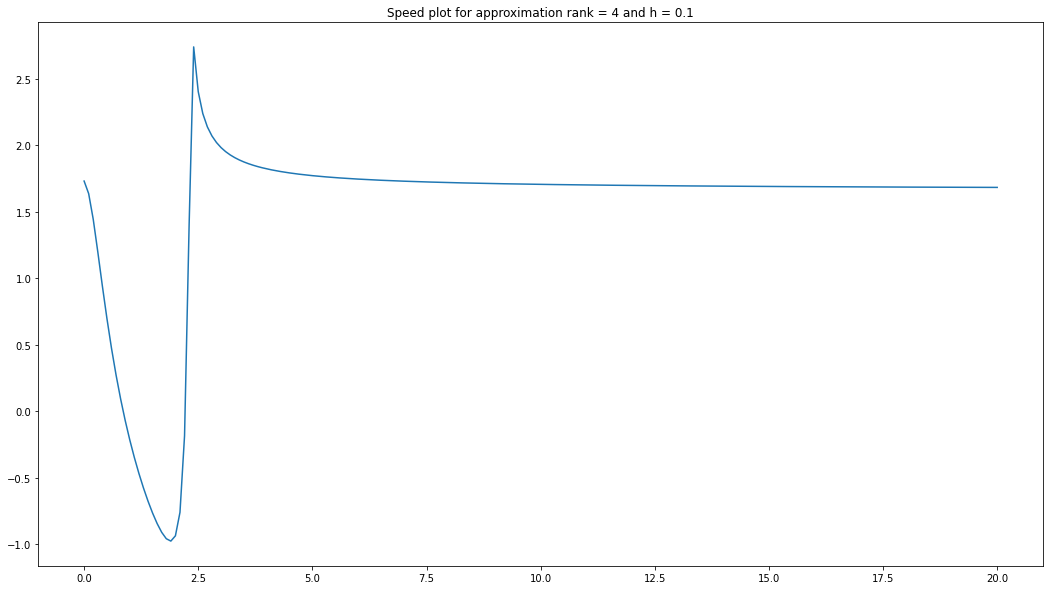

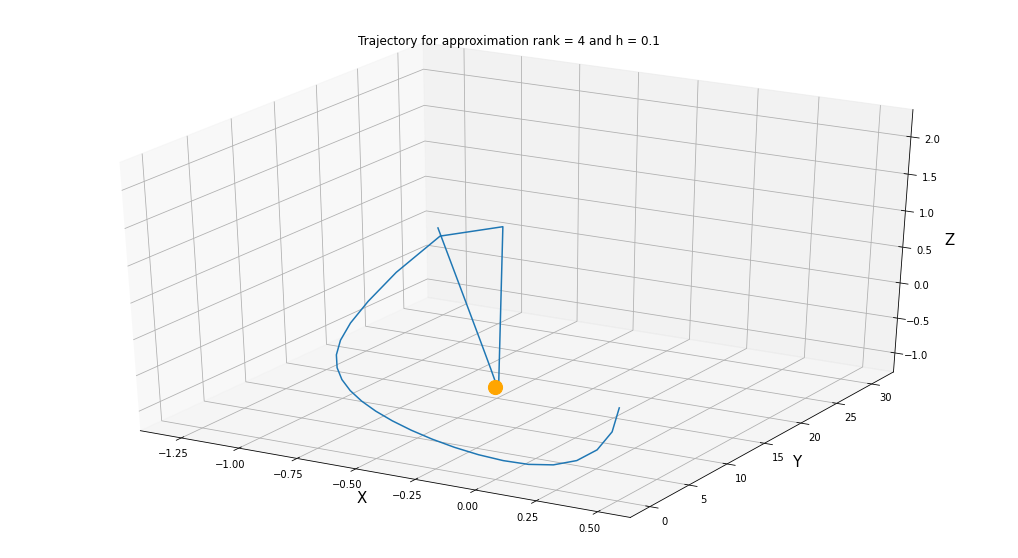

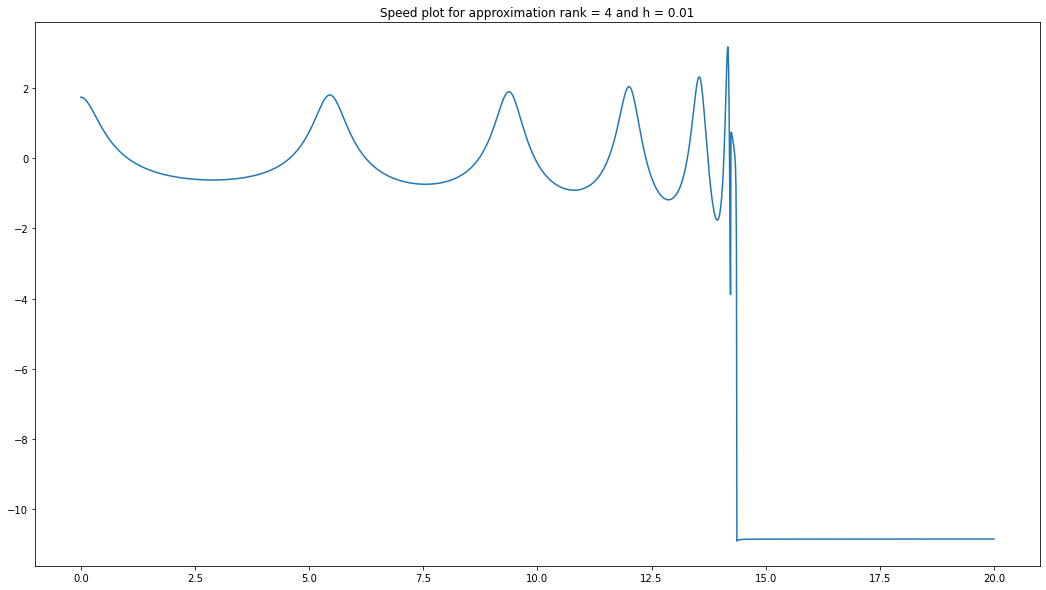

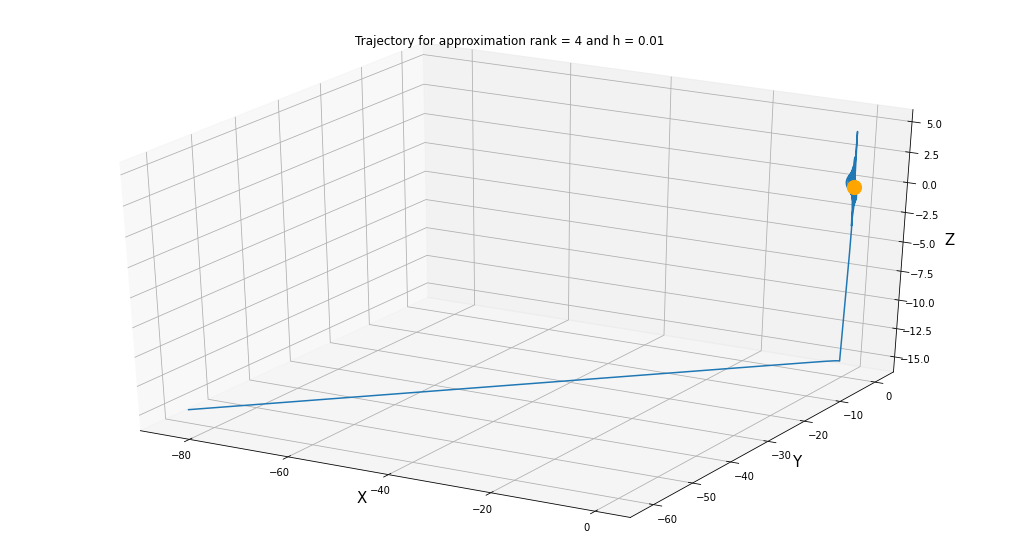

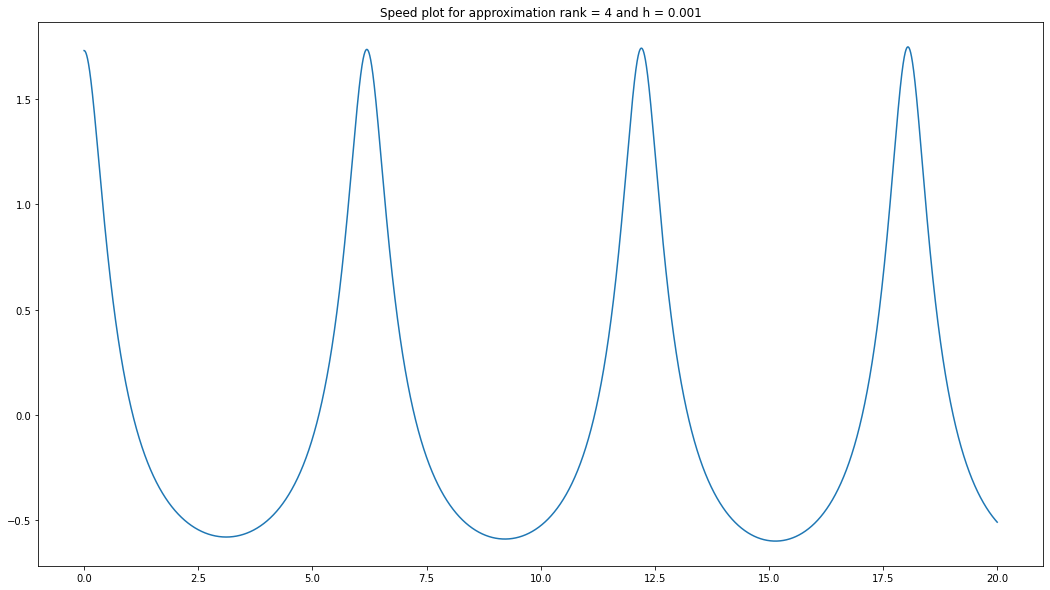

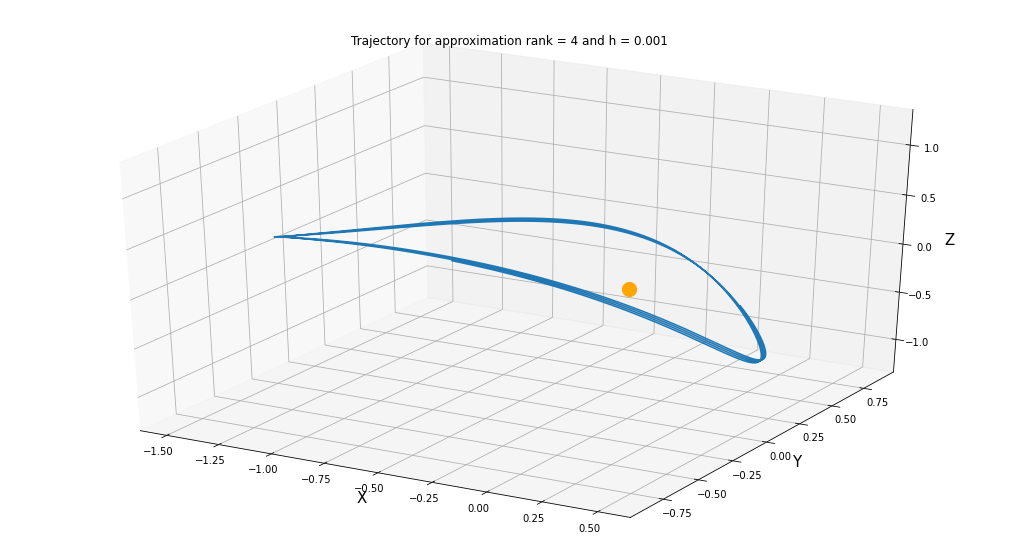

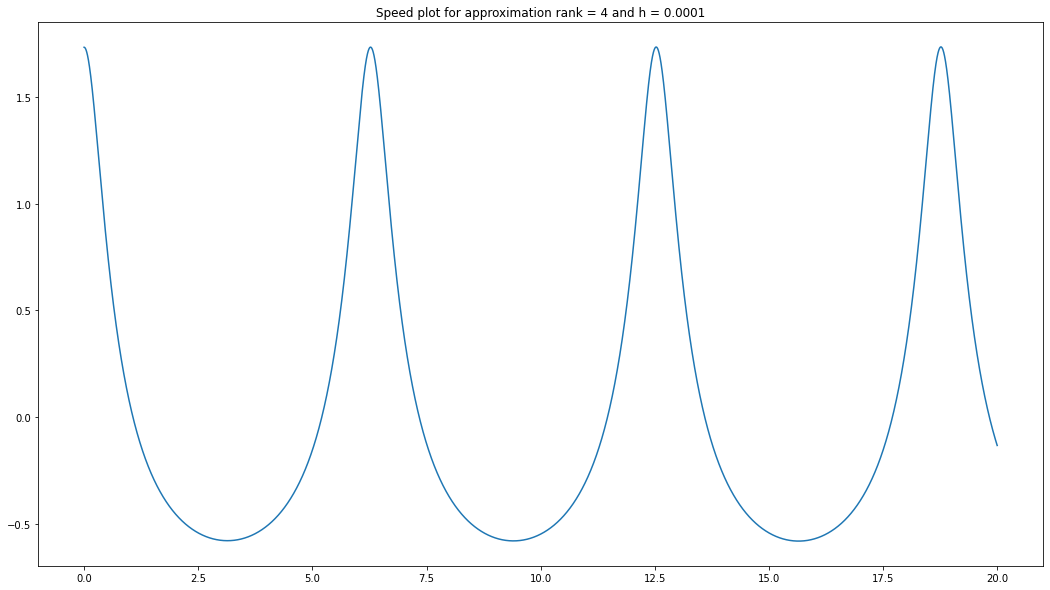

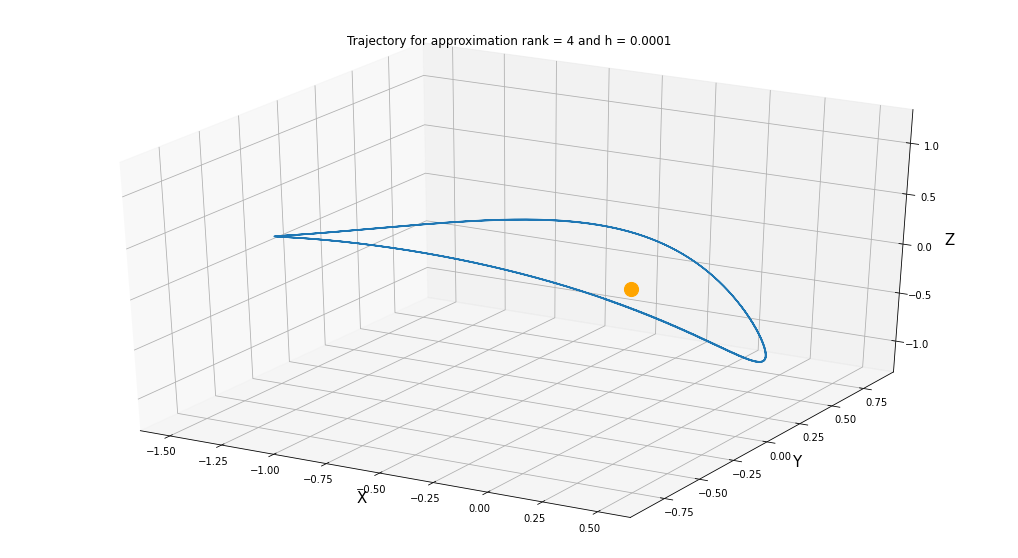

In [ ]:
h_divider = 10
while h_divider <= 10000:
  rk = RungeCutt(differentialEquation, 4, initial_position, h=1/h_divider)
  drawPlots(rk.calcTrajectory(), 4, 1/h_divider)
  h_divider *= 10